In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
df=pd.read_csv("HousingData.csv")[["TAX","MEDV"]]

In [15]:
df

,TAX,MEDV
0,296,24.0
1,242,21.6
2,242,34.7
3,222,33.4
4,222,36.2
...,...,...
501,273,22.4
502,273,20.6
503,273,23.9
504,273,22.0


In [16]:
tx=df["TAX"].to_numpy()
medv=df["MEDV"].to_numpy()

In [17]:
x_mean = tx.mean()
y_mean = medv.mean()

In [20]:
Sxy=0
Sxx=0
for i in range(0,506):
    Sxy += ((medv[i] - y_mean)*(tx[i] - x_mean))
    Sxx += ((tx[i] - x_mean) ** 2)

In [21]:
B1=Sxy/Sxx
B1

-0.025568099481987218

In [22]:
B0 = y_mean - B1 * x_mean
B0

32.97065449366628

In [23]:
SSres=0
for i in range(0,506):
    SSres += ((medv[i] - B1*tx[i] - B0) ** 2)
SSres

33338.96132044061

In [24]:
MSres = SSres / 504
MSres

66.148732778652

In [25]:
t = (B1 / (np.sqrt(MSres/Sxx)) )
t

-11.906357821660777

<H1>  t-table value at significance value 0.95 and degree of freedom 504 is 0.0632 , since |t| > t-table, we reject the null hypothesis that B1=0, hence there is a linear dependence </H1>

In [26]:
B1, B0

(-0.025568099481987218, 32.97065449366628)

In [27]:
predicted=[]
for i in range(0,506):
    predicted.append(B1*tx[i]+B0)

In [28]:
df["PRED"]=predicted
df

,TAX,MEDV,PRED
0,296,24.0,25.402497
1,242,21.6,26.783174
2,242,34.7,26.783174
3,222,33.4,27.294536
4,222,36.2,27.294536
...,...,...,...
501,273,22.4,25.990563
502,273,20.6,25.990563
503,273,23.9,25.990563
504,273,22.0,25.990563


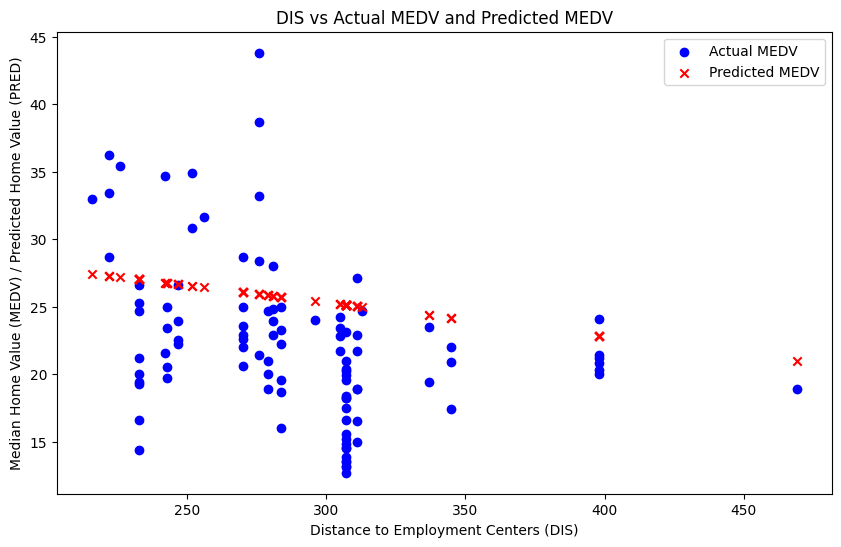

In [29]:
import matplotlib.pyplot as plt

# Assuming DIS, MEDV, and PRED are your lists or arrays
plt.figure(figsize=(10, 6))

# Scatter plot for MEDV (actual values) against DIS
plt.scatter(df.TAX[0:100], df.MEDV[0:100], label='Actual MEDV', color='blue', marker='o')

# Scatter plot for PRED (predicted values) against DIS
plt.scatter(df.TAX[0:100], df.PRED[0:100], label='Predicted MEDV', color='red', marker='x')

# Labels for the axes
plt.xlabel('Distance to Employment Centers (DIS)')
plt.ylabel('Median Home Value (MEDV) / Predicted Home Value (PRED)')

# Title of the plot
plt.title('DIS vs Actual MEDV and Predicted MEDV')

# Adding a legend to distinguish between the actual and predicted values
plt.legend()

# Display the plot
plt.show()


In [30]:
SSreg=0
SSt=0
for i in range(0, 506):
    SSreg += ((predicted[i] - y_mean) ** 2)
    SSt += ((medv[i] - y_mean) ** 2)
SSreg, SSt

(9377.334094579137, 42716.2954150198)

In [31]:
R2 = SSreg / SSt
R2

0.21952592104421823